In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [21]:
df=pd.read_csv('/content/Export.csv')

In [22]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Item Code (CPC),Item,Year,Unit,Import,Export,Production,Consumption
0,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2014,t,283.85,21099.0,21500.00,684.85
1,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2015,t,1000.16,17340.0,18000.00,1660.16
2,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2016,t,814.88,8353.0,17333.33,9795.21
3,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2017,t,3.67,8500.0,18234.12,9737.79
4,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2018,t,112.30,9456.0,17855.82,8512.12


In [23]:
df.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Item Code (CPC),Item,Year,Unit,Import,Export,Production,Consumption
45316,TCL,Crops and livestock products,716,Zimbabwe,5610,1658,"Vanilla, raw",2014,t,0.04,0.0,10.09,10.13
45317,TCL,Crops and livestock products,716,Zimbabwe,5610,1658,"Vanilla, raw",2015,t,0.10,0.0,10.11,10.21
45318,TCL,Crops and livestock products,716,Zimbabwe,5610,1658,"Vanilla, raw",2016,t,0.01,0.0,9.73,9.74
45319,TCL,Crops and livestock products,716,Zimbabwe,5610,1658,"Vanilla, raw",2019,t,0.02,0.0,9.88,9.90
45320,TCL,Crops and livestock products,716,Zimbabwe,5610,1658,"Vanilla, raw",2023,t,0.12,0.0,9.92,10.04


In [24]:
#Shape
df.shape

(45321, 13)

#***EDA(Explotary Data Analysis):-***

In [25]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45321 entries, 0 to 45320
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain Code      45321 non-null  object 
 1   Domain           45321 non-null  object 
 2   Area Code (M49)  45321 non-null  int64  
 3   Area             45321 non-null  object 
 4   Element Code     45321 non-null  int64  
 5   Item Code (CPC)  45321 non-null  int64  
 6   Item             45321 non-null  object 
 7   Year             45321 non-null  int64  
 8   Unit             45321 non-null  object 
 9   Import           45321 non-null  float64
 10  Export           45321 non-null  float64
 11  Production       45321 non-null  float64
 12  Consumption      45321 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 4.5+ MB


In [26]:
df.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year,Import,Export,Production,Consumption
count,45321.000000,45321.0,45321.000000,45321.000000,4.532100e+04,4.532100e+04,4.532100e+04,4.532100e+04
mean,422.784824,5610.0,1611.224333,2009.062267,2.979475e+03,3.304097e+03,3.088251e+04,3.055789e+04
std,252.530226,0.0,128.138020,8.784068,2.463151e+04,3.111707e+04,4.981218e+05,4.939798e+05
min,4.000000,5610.0,1231.000000,1993.000000,0.000000e+00,0.000000e+00,0.000000e+00,-5.009568e+04
25%,203.000000,5610.0,1652.000000,2002.000000,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,410.000000,5610.0,1654.000000,2009.000000,5.090000e+01,1.000000e+00,0.000000e+00,8.223000e+01
75%,642.000000,5610.0,1656.000000,2017.000000,5.396500e+02,7.480000e+01,0.000000e+00,1.113050e+03
max,894.000000,5610.0,1658.000000,2023.000000,1.334022e+06,1.220169e+06,1.734695e+07,1.732090e+07


In [27]:
#missing values
df.isnull().sum()

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Item Code (CPC),0
Item,0
Year,0
Unit,0
Import,0


In [28]:
#check the duplicate rows
df.duplicated().sum()

np.int64(0)

In [29]:
#check the unit column
df['Unit'].value_counts()

,count
Unit,
t,45321


In [30]:
#so drop the t column not relevent
df.drop('Unit',axis=1,inplace=True)

In [31]:
#check the Domain Code column
df['Domain Code'].value_counts()

,count
Domain Code,
TCL,45321


In [32]:
#so we drop the column Domain Code
df.drop('Domain Code',axis=1,inplace=True)

In [34]:
#check the column Element Code
df['Element Code'].value_counts()

,count
Element Code,
5610,45321


In [35]:
#drop the column has single vales
df.drop('Element Code',axis=1,inplace=True)

In [39]:
#check the domain are single values
df['Domain'].value_counts()

,count
Domain,
Crops and livestock products,45321


In [40]:
#drrop the domain columns
df.drop('Domain',axis=1,inplace=True)

In [42]:
#check the shape of dataset
df.shape

(45321, 9)

<Axes: xlabel='Item'>

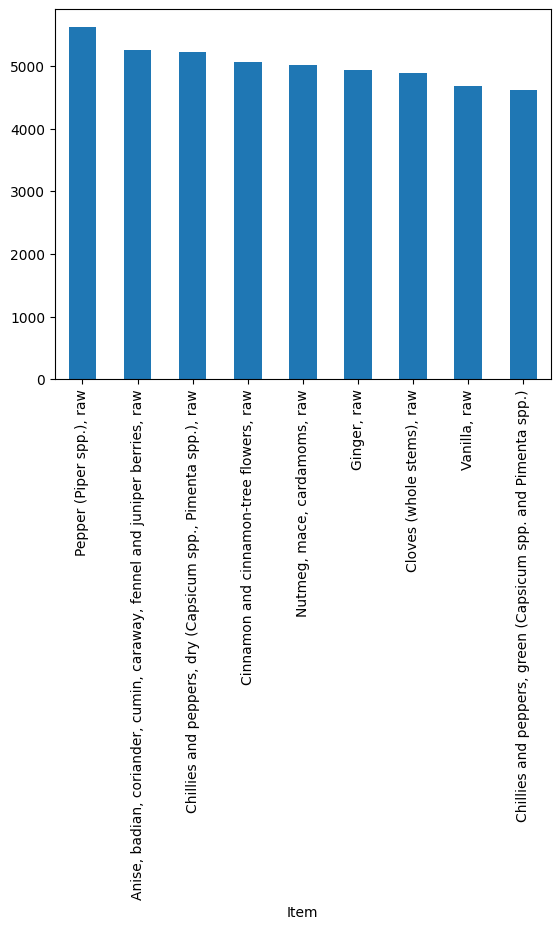

In [43]:
#bar chart which top 10 domanin has highest export
df['Item'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='Area'>

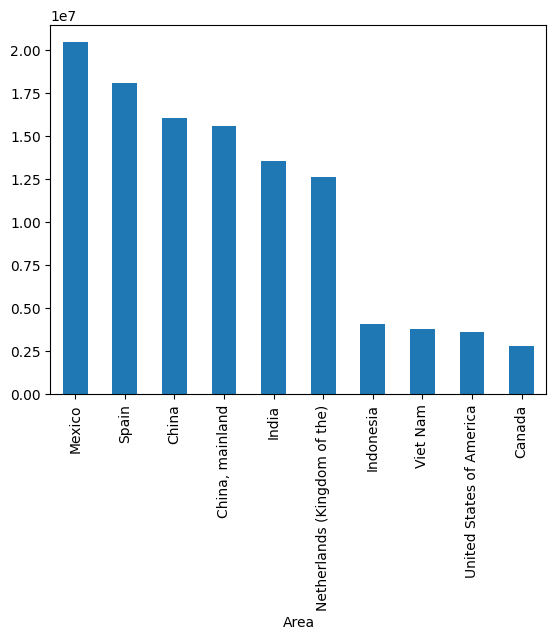

In [51]:
#top 10 Area/ country has export group country on basics of export values
df.groupby('Area')['Export '].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Area'>

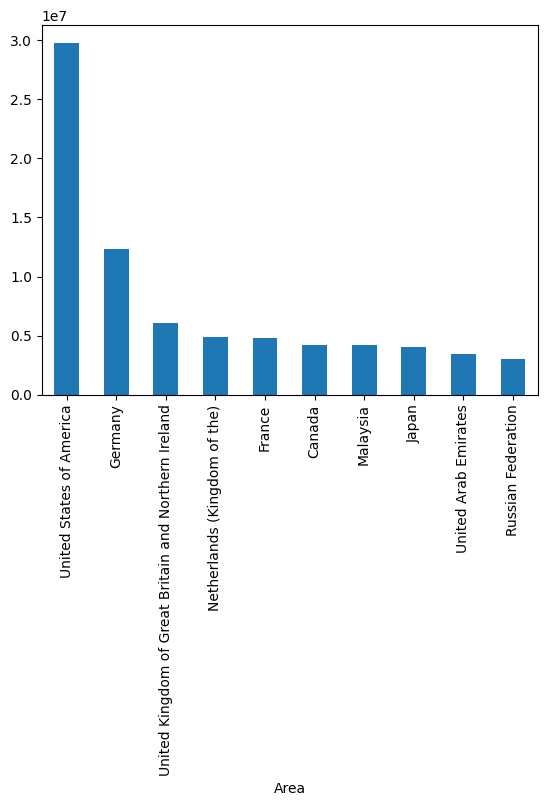

In [52]:
#top 10 Area/ country has import
df.groupby('Area')['Import'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [41]:
df.head()

,Area Code (M49),Area,Item Code (CPC),Item,Year,Import,Export,Production,Consumption
0,4,Afghanistan,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2014,283.85,21099.0,21500.00,684.85
1,4,Afghanistan,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2015,1000.16,17340.0,18000.00,1660.16
2,4,Afghanistan,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2016,814.88,8353.0,17333.33,9795.21
3,4,Afghanistan,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2017,3.67,8500.0,18234.12,9737.79
4,4,Afghanistan,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2018,112.30,9456.0,17855.82,8512.12


<Axes: xlabel='Area'>

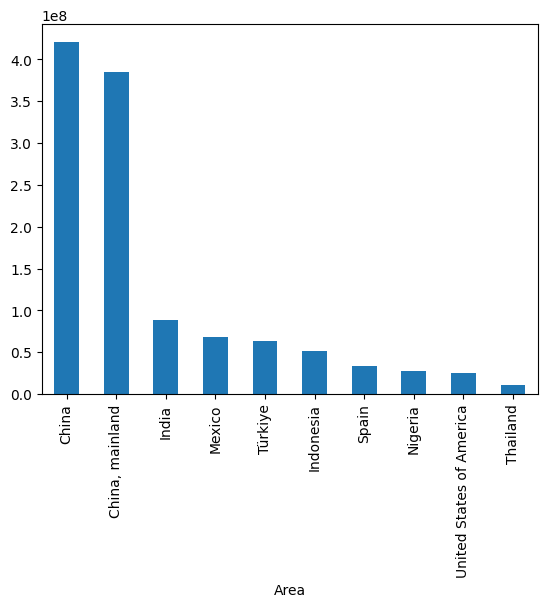

In [53]:
#top 10 country high production
df.groupby('Area')['Production'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Area'>

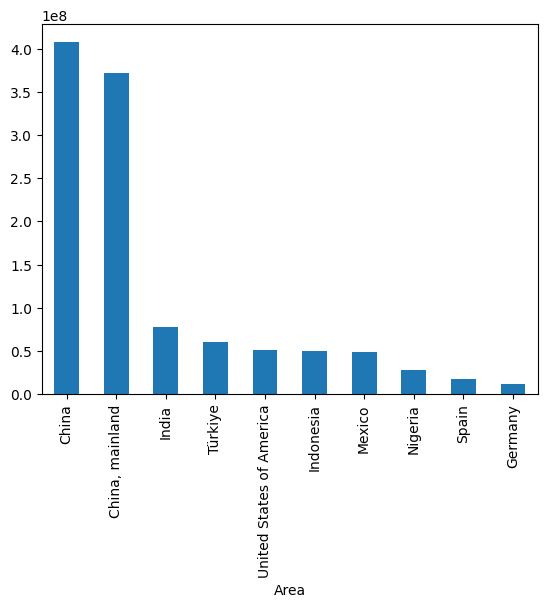

In [54]:
#top 10 country with high consumtion
df.groupby('Area')['Consumption'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Year'>

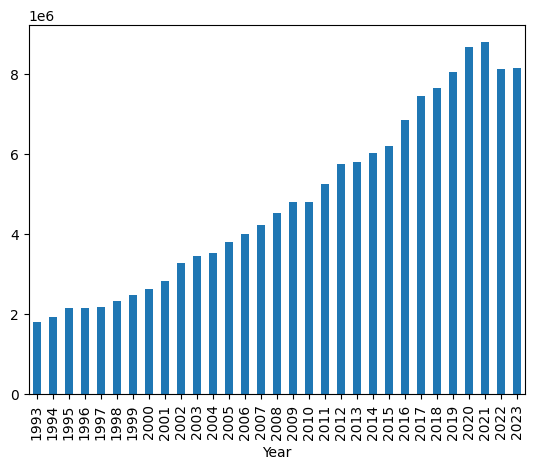

In [55]:
#year wise export line bar
df.groupby('Year')['Export '].sum().plot(kind='bar')